In [60]:
'''
Here, the implementations are done using 3 methods:
1. From scratch without libraries
2. using scikit-learn
Also., some exploratory data analysis is performed
'''

'\nHere, the implementations are done using 3 methods:\n1. From scratch without libraries\n2. using scikit-learn\nAlso., some exploratory data analysis is performed\n'

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import copy
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
'''The dataset used is mall customer segmentation data, which was created for educational purpose, and downloaded from kaggle
'''
df = pd.read_csv('Mall_Customers.csv')
df = pd.DataFrame(df)
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
print(df.shape)

(200, 5)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
# Calculate gender split
gender_counts = df['Gender'].value_counts(normalize=True) * 100

# Display
print("Gender Split (%):\n")
print(gender_counts)

Gender Split (%):

Gender
Female    56.0
Male      44.0
Name: proportion, dtype: float64


In [9]:
'''Correlation matrix'''

df_num = df.select_dtypes(include=['number'])
correlation_matrix = df_num.corr()
correlation_matrix

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


In [10]:
'''Initially, we need to convert the categorical variables into numerical values'''

df_encoded = pd.get_dummies(df, columns=['Gender'], drop_first=True)
df_encoded['Gender_Male'] = df_encoded['Gender_Male'].astype(int)
print("\nDataFrame after encoding 'Gender':")
df_encoded


DataFrame after encoding 'Gender':


,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0
...,...,...,...,...,...
195,196,35,120,79,0
196,197,45,126,28,0
197,198,32,126,74,1
198,199,32,137,18,1


In [11]:
'''Correlation matrix'''
correlation_matrix_2 = df_encoded.corr()
correlation_matrix_2

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
CustomerID,1.000000,-0.026763,0.977548,0.013835,0.057400
Age,-0.026763,1.000000,-0.012398,-0.327227,0.060867
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903,0.056410
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000,-0.058109
Gender_Male,0.057400,0.060867,0.056410,-0.058109,1.000000


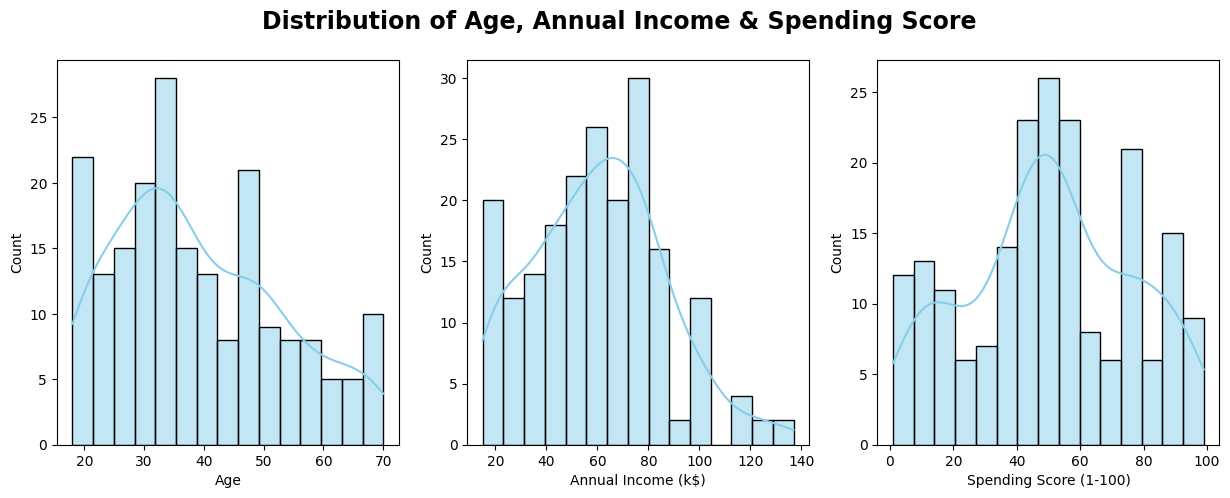

In [12]:
# Create Histograms
plt.figure(figsize=(15, 5))

for i, col in enumerate(['Age', 'Annual Income (k$)', 'Spending Score (1-100)']):
    plt.subplot(1, 3, i+1)
    sns.histplot(data=df, x=col, bins=15, kde=True, color='skyblue')
    plt.xlabel(col)

plt.suptitle('Distribution of Age, Annual Income & Spending Score', fontsize=17, fontweight = 'bold', ha='center')
plt.subplots_adjust(wspace=0.2)
plt.show()

<Figure size 1500x600 with 0 Axes>

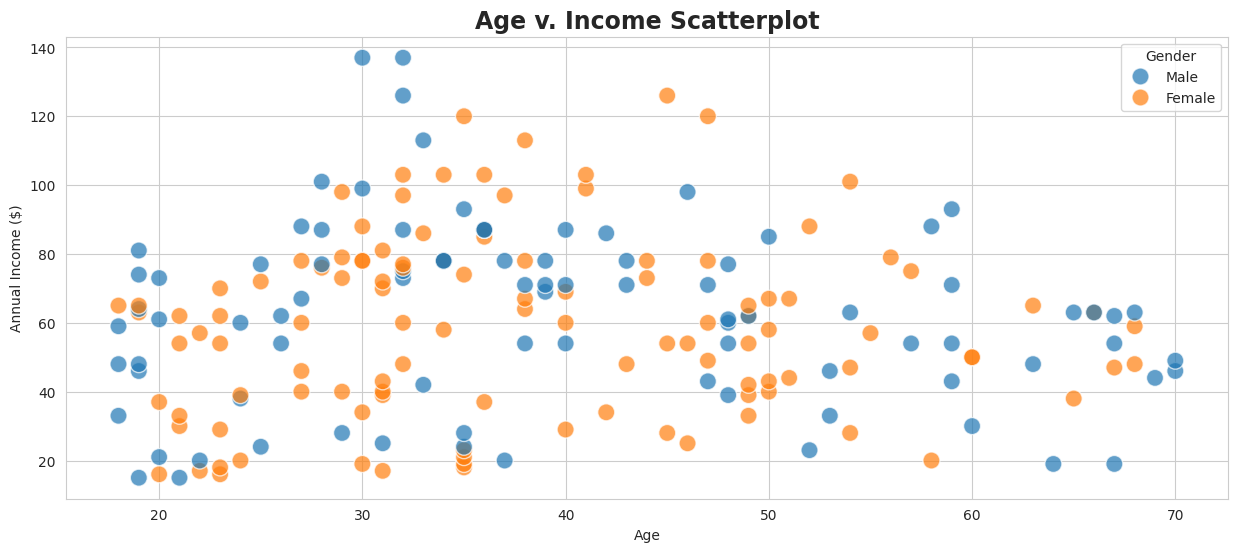

In [13]:
# Set style
sns.set_style('whitegrid')
plt.figure(figsize=(15, 6))

# Create Scatterplot
plt.figure(figsize=(15, 6))
sns.scatterplot(x='Age', y='Annual Income (k$)', data=df, hue='Gender', s=150, alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Annual Income ($)')
plt.title('Age v. Income Scatterplot', fontsize=17, fontweight = 'bold')

# Display
plt.show()

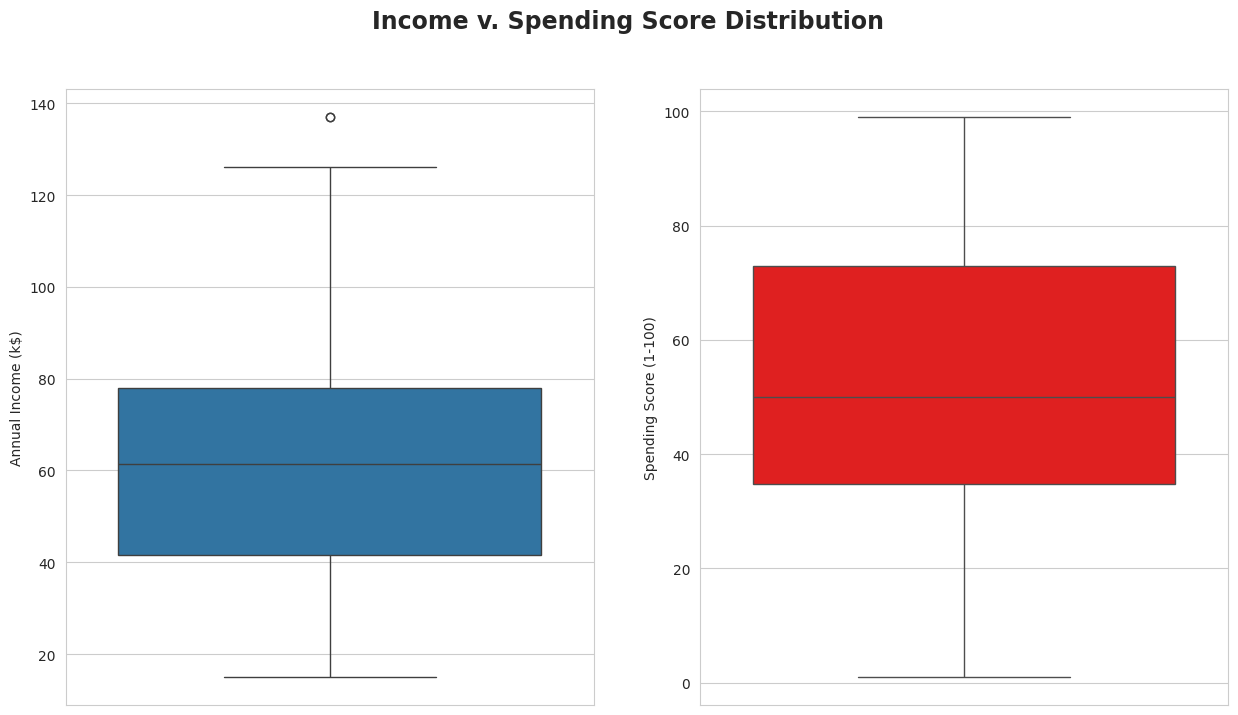

In [59]:
sns.set_style('whitegrid')
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.boxplot(y=df["Annual Income (k$)"])
plt.subplot(1, 2, 2)
sns.boxplot(y=df["Spending Score (1-100)"], color='red')
plt.suptitle('Income v. Spending Score Distribution', fontsize=17, fontweight='bold', x=0.5)
plt.show()

In [14]:
x = df_encoded.iloc[:,1:4]
x_cat = df_encoded.iloc[:,-1]

In [15]:
print(x.shape)
x

(200, 3)


,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [16]:
x_cat

0      1
1      1
2      0
3      0
4      0
      ..
195    0
196    0
197    1
198    1
199    1
Name: Gender_Male, Length: 200, dtype: int64

In [17]:
x = np.array(x)
x_cat = np.array(x_cat).reshape(-1,1)
print(x.shape)
print(x_cat.shape)

(200, 3)
(200, 1)


In [58]:
class KMeansClustering:
    
    '''
    Implementation of K-Means Clustering from scratch without using inbuilt libraries like scikit-learn
    '''
    def __init__(self, k=3, max_iters=1000, tolerance=1e-4, plot_steps=True):
        '''
        k : Number of clusters
        max_iters : Maximum number of iterations it can go before termination
        tolerance : Tolerance level to check the termination condition
        plot_steps : Whether to plot the steps during the clustering process
        '''
        self.k = k
        self.max_iters = max_iters
        self.tolerance = tolerance
        self.plot_steps = plot_steps

    def predict(self, x):
        '''
        1. Randomly initialize the centroids, which are taken from the data points.
        2. Based on the distance, assign the centroid to each point.
        3. Repeat until convergence.
        '''
        m, n = x.shape
        random_indices = np.random.choice(m, self.k, replace=False)
        centroids = [x[i] for i in random_indices]

        for _ in range(self.max_iters):
            clusters = [[] for _ in range(self.k)]
            data_indices = []
            for i in range(m):
                index_centroid = self.find_centroid(centroids, x[i])
                clusters[index_centroid].append(x[i])
                data_indices.append(index_centroid)
            
            centroids_prev = centroids.copy()
            centroids = [np.mean(cluster, axis=0) if cluster else centroids_prev[idx] 
                         for idx, cluster in enumerate(clusters)]
            
            if self.is_converged(centroids_prev, centroids):
                break

        if self.plot_steps:
            self.plot_cluster(clusters, centroids)

        return centroids, clusters, data_indices

    def find_centroid(self, centroids, point):
        '''
        Given a point and centroids, find the closest centroid based on Euclidean distance.
        '''
        distances = [self.find_distance(point, centroid) for centroid in centroids]
        return np.argmin(distances)

    def find_distance(self, a, b):
        '''
        Finds Euclidean distance between two points.
        '''
        return np.sqrt(np.sum((a - b) ** 2))

    def is_converged(self, centroids_old, centroids_new):
        '''
        Check if the centroids have converged.
        '''
        total_movement = sum(self.find_distance(centroids_old[i], centroids_new[i]) for i in range(len(centroids_old)))
        return total_movement < self.tolerance

    def plot_cluster(self, clusters, centroids):
        '''
        Plot the clusters and centroids.
        '''
        fig, ax = plt.subplots(figsize=(12, 8))

        for i, cluster in enumerate(clusters):
            cluster = np.array(cluster)
            if cluster.size > 0:
                points = cluster.T
                ax.scatter(points[0], points[1], label=f'Cluster {i+1}')

        for centroid in centroids:
            ax.scatter(centroid[0], centroid[1], marker="x", color="black", linewidth=2, label='Centroid')

        ax.legend()
        plt.show()
    
   

In [24]:
'''Standardise the data using standard scaler'''
scaler = StandardScaler()
x = scaler.fit_transform(x)
x_train = np.hstack((x, x_cat))
print(x_train)
print(x_train.shape)

[[-1.42456879 -1.73899919 -0.43480148  1.        ]
 [-1.28103541 -1.73899919  1.19570407  1.        ]
 [-1.3528021  -1.70082976 -1.71591298  0.        ]
 [-1.13750203 -1.70082976  1.04041783  0.        ]
 [-0.56336851 -1.66266033 -0.39597992  0.        ]
 [-1.20926872 -1.66266033  1.00159627  0.        ]
 [-0.27630176 -1.62449091 -1.71591298  0.        ]
 [-1.13750203 -1.62449091  1.70038436  0.        ]
 [ 1.80493225 -1.58632148 -1.83237767  1.        ]
 [-0.6351352  -1.58632148  0.84631002  0.        ]
 [ 2.02023231 -1.58632148 -1.4053405   1.        ]
 [-0.27630176 -1.58632148  1.89449216  0.        ]
 [ 1.37433211 -1.54815205 -1.36651894  0.        ]
 [-1.06573534 -1.54815205  1.04041783  0.        ]
 [-0.13276838 -1.54815205 -1.44416206  1.        ]
 [-1.20926872 -1.54815205  1.11806095  1.        ]
 [-0.27630176 -1.50998262 -0.59008772  0.        ]
 [-1.3528021  -1.50998262  0.61338066  1.        ]
 [ 0.94373197 -1.43364376 -0.82301709  1.        ]
 [-0.27630176 -1.43364376  1.85

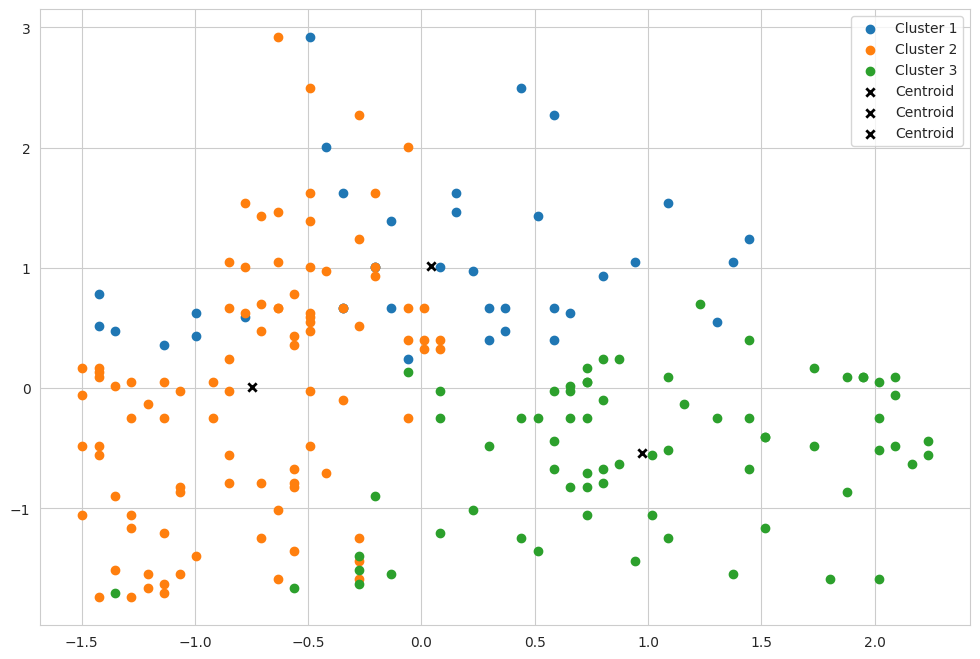

In [26]:
model = KMeansClustering(k=3, max_iters=100, tolerance=1e-5)
centroids, clusters, data_indices = model.predict(x_train)

In [27]:
'''Standardise the data using Min-max scaler'''
scaler2 = MinMaxScaler()
x2 = scaler2.fit_transform(x)
x_train2 = np.hstack((x2, x_cat))
print(x_train2)
print(x_train2.shape)

[[0.01923077 0.         0.3877551  1.        ]
 [0.05769231 0.         0.81632653 1.        ]
 [0.03846154 0.00819672 0.05102041 0.        ]
 [0.09615385 0.00819672 0.7755102  0.        ]
 [0.25       0.01639344 0.39795918 0.        ]
 [0.07692308 0.01639344 0.76530612 0.        ]
 [0.32692308 0.02459016 0.05102041 0.        ]
 [0.09615385 0.02459016 0.94897959 0.        ]
 [0.88461538 0.03278689 0.02040816 1.        ]
 [0.23076923 0.03278689 0.7244898  0.        ]
 [0.94230769 0.03278689 0.13265306 1.        ]
 [0.32692308 0.03278689 1.         0.        ]
 [0.76923077 0.04098361 0.14285714 0.        ]
 [0.11538462 0.04098361 0.7755102  0.        ]
 [0.36538462 0.04098361 0.12244898 1.        ]
 [0.07692308 0.04098361 0.79591837 1.        ]
 [0.32692308 0.04918033 0.34693878 0.        ]
 [0.03846154 0.04918033 0.66326531 1.        ]
 [0.65384615 0.06557377 0.28571429 1.        ]
 [0.32692308 0.06557377 0.98979592 0.        ]
 [0.32692308 0.07377049 0.34693878 1.        ]
 [0.13461538 

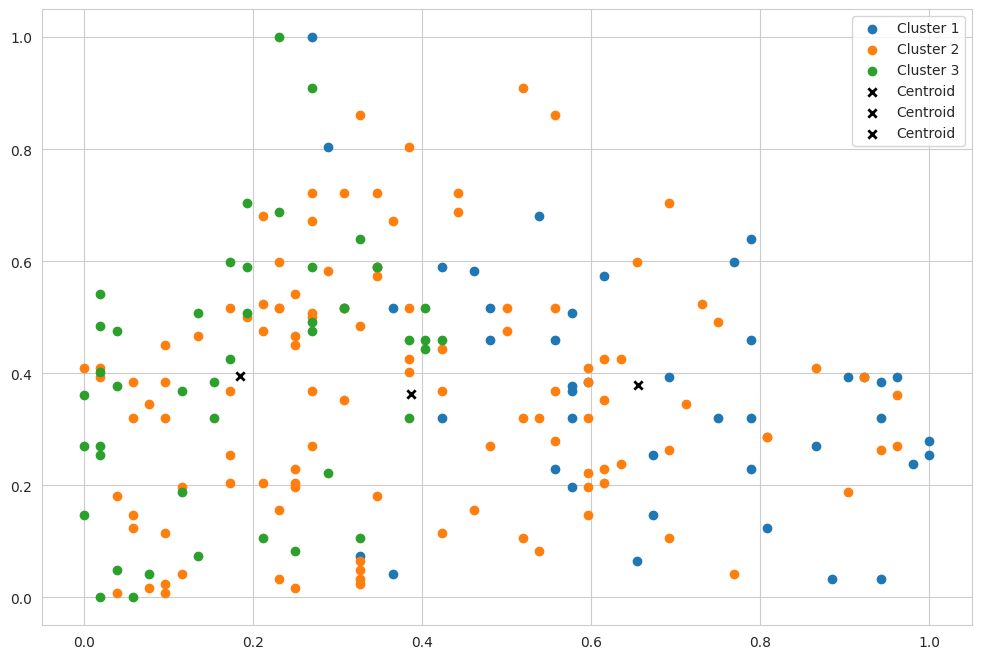

In [28]:
model2 = KMeansClustering(k=3, max_iters=1000, tolerance=1e-4)
centroids2, clusters2, data_indices = model2.predict(x_train2)

In [43]:
def elbow_method(k, x):
    '''
    k : maximum number of clusters
    x : data
    '''
    wcss = []
    for i in range(1, k+1):
        model = KMeansClustering(k=i, max_iters=1000, tolerance=1e-4, plot_steps=False)
        centroids, clusters, data_indices = model.predict(x)
        
        total_variation = 0
        for j in range(i):
            dist_i = np.sum([np.sqrt(np.sum((point - centroids[j]) ** 2)) for point in clusters[j]])
            total_variation += dist_i
        wcss.append(total_variation)

    plt.figure(figsize=(10, 8))
    plt.plot(range(1, k+1), wcss, marker='o')
    plt.title('Elbow Method for Optimal k')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
    plt.show()

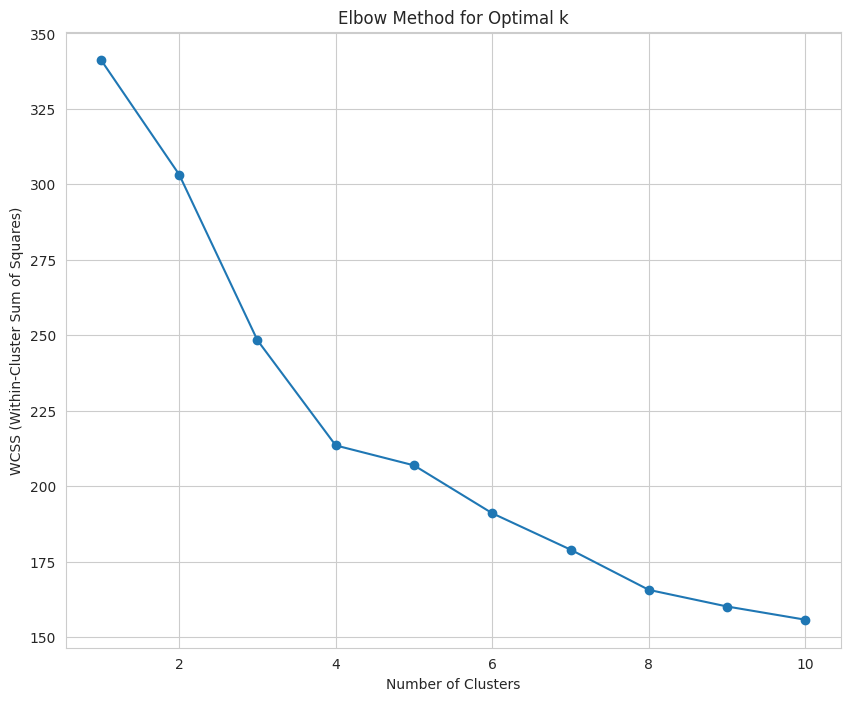

In [44]:
elbow_method(10, x_train)

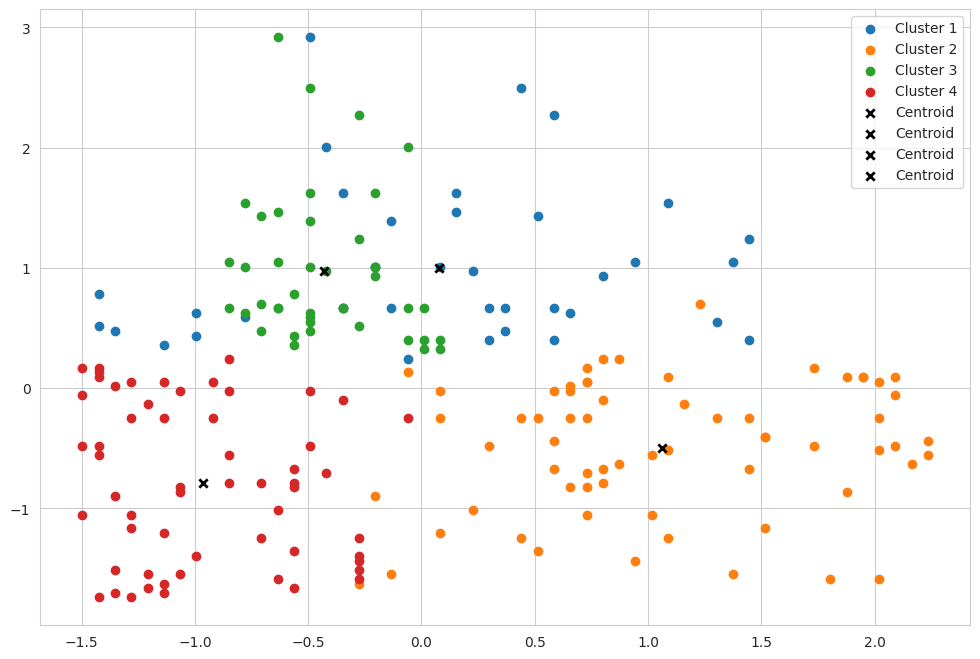

In [45]:
'''Sharp change : x = 4'''
scaler = StandardScaler()
x = scaler.fit_transform(x)
x_train = np.hstack((x, x_cat))
model = KMeansClustering(k = 4, max_iters=1000, tolerance=1e-4)
centroids, clusters, data_indices = model.predict(x_train)

In [46]:
df['clusters'] = data_indices
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
0,1,Male,19,15,39,3
1,2,Male,21,15,81,3
2,3,Female,20,16,6,3
3,4,Female,23,16,77,3
4,5,Female,31,17,40,3
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,0
197,198,Male,32,126,74,2
198,199,Male,32,137,18,0


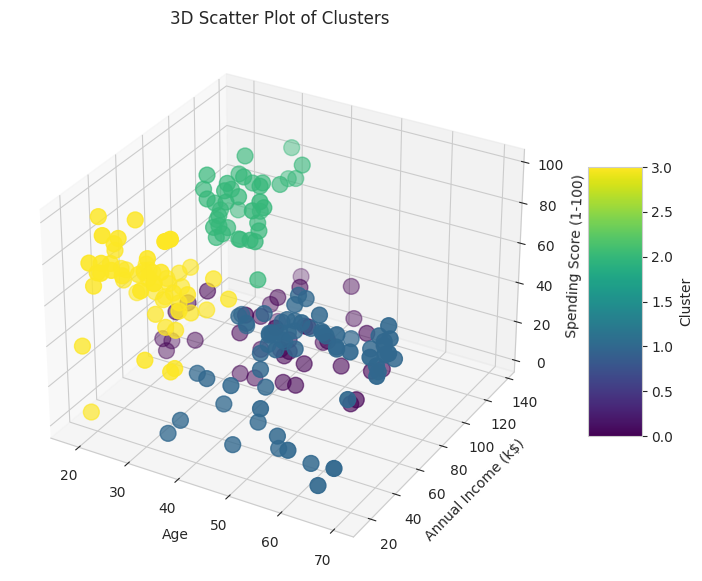

In [56]:
'''3D Scatter plot'''

# Plot the 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Define colormap
my_cmap = plt.get_cmap('viridis')

# Create scatter plot
scatter = ax.scatter(df_encoded['Age'], df_encoded['Annual Income (k$)'], df_encoded['Spending Score (1-100)'], c=df['clusters'], s=130, cmap=my_cmap)

# Set labels
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('3D Scatter Plot of Clusters')

# Add color bar
colorbar = fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=5)
colorbar.set_label('Cluster')

# Show plot
plt.show()


The conclusion drawn from the elbow method was that the optimum number of clusters was found to be 4 and the corresponding plots which
sums up the same has been displayed above.